<a href="https://colab.research.google.com/github/AkhileshPandeyji/Udacity-deep-gocolab/blob/master/transferLearningCatsvsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tf-nightly-gpu
!pip install "tensorflow_hub==0.4.0"
!pip install tensorflow_datasets 

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL.Image as Image



tf.logging.set_verbosity(tf.logging.ERROR)

tf.enable_eager_execution()

print(tf.__version__)


  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  
1.15.0-dev20190821


In [0]:
# Getting the mobilenet model

# with classification layer

IMG_SIZE = 224

model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"

model = tf.keras.Sequential([
    hub.KerasLayer(model_url,input_shape=(IMG_SIZE,IMG_SIZE,3))
])

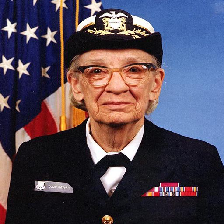

In [4]:
# Trying out this model 
image_file = tf.keras.utils.get_file('img1.jpg',origin="https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg")
image_test = Image.open(image_file).resize((IMG_SIZE,IMG_SIZE))
image_test

In [5]:
image_arr = np.array(image_test)/255.0
image_arr = image_arr[np.newaxis,...]

predictions = model.predict(image_arr)

class_label_index = np.argmax(predictions)
print(class_label_index)

653


In [6]:
# downloading the class labels list
class_file = tf.keras.utils.get_file("ImageNetLabels.txt",origin='https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
class_labels = np.array(open(class_file).read().splitlines())
print(class_labels)

['background' 'tench' 'goldfish' ... 'bolete' 'ear' 'toilet tissue']


In [7]:
print("Prediction: {}".format(class_labels[class_label_index]))

Prediction: military uniform


In [0]:
# using it for the Cats Vs Dogs Scenario
# that is using transfer learning model

In [9]:
# getting the datasets
splits = tfds.Split.ALL.subsplit(weighted=(80,20))
splits,info = tfds.load('cats_vs_dogs',as_supervised=True,with_info=True,split=splits)
(train_dataset,val_dataset) = splits

num_train_examples = info.splits['train'].num_examples

num_classes = info.features['label'].num_classes
print(num_train_examples,num_classes)

23262 2


In [0]:
#creating batches and formating images- resizing and scaling

BATCH_SIZE = 32

def format(images,labels):
  images = tf.image.resize(images,(IMG_SIZE,IMG_SIZE))/255.0
  return images,labels

train_batches = train_dataset.shuffle(num_train_examples).map(format).batch(BATCH_SIZE).prefetch(1)
val_batches = val_dataset.map(format).batch(BATCH_SIZE).prefetch(1)
  


In [0]:
# Building model without last classification layer of mobilenet
model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"
feature_extractor = hub.KerasLayer(model_url,input_shape=(IMG_SIZE,IMG_SIZE,3))
feature_extractor.trainable = False

model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(units=2,activation=tf.nn.softmax)
])


In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
EPOCHS = 6
history = model.fit(train_batches,
                   epochs=EPOCHS,
                   validation_data=val_batches)

Epoch 1/6
582/582 [==============================] - 91s 156ms/step - loss: 0.2232 - acc: 0.9439 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/6
582/582 [==============================] - 82s 140ms/step - loss: 0.1837 - acc: 0.9628 - val_loss: 0.1634 - val_acc: 0.9677
Epoch 3/6
582/582 [==============================] - 81s 139ms/step - loss: 0.1751 - acc: 0.9657 - val_loss: 0.1629 - val_acc: 0.9681
Epoch 4/6
582/582 [==============================] - 81s 138ms/step - loss: 0.1699 - acc: 0.9677 - val_loss: 0.1635 - val_acc: 0.9670
Epoch 5/6
582/582 [==============================] - 81s 138ms/step - loss: 0.1660 - acc: 0.9693 - val_loss: 0.1646 - val_acc: 0.9683
Epoch 6/6
582/582 [==============================] - 81s 139ms/step - loss: 0.1629 - acc: 0.9706 - val_loss: 0.1659 - val_acc: 0.9675


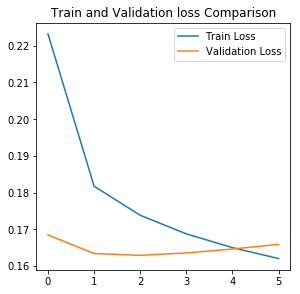

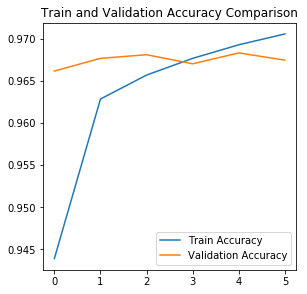

In [14]:
train_loss = history.history['loss']
train_acc = history.history['acc']

val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

epoch = range(EPOCHS)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Train and Validation loss Comparison")
plt.plot(epoch,train_loss)
plt.plot(epoch,val_loss)
plt.legend(['Train Loss','Validation Loss'])

plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
plt.title("Train and Validation Accuracy Comparison")
plt.plot(epoch,train_acc)
plt.plot(epoch,val_acc)
plt.legend(['Train Accuracy','Validation Accuracy'])

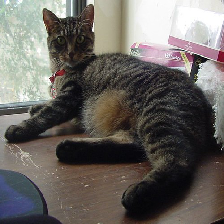

In [15]:
# predicting time
# getting cat and dogs image

cat_image_file = tf.keras.utils.get_file('cattesting.jpg',origin="https://farm1.static.flickr.com/42/107018255_929f20ef60.jpg")
cat_image = Image.open(cat_image_file).resize((IMG_SIZE,IMG_SIZE))

dog_image_file = tf.keras.utils.get_file('dogtesting.jpg',origin="https://farm1.static.flickr.com/14/18490844_5c1f793f24.jpg")
dog_image = Image.open(dog_image_file).resize((IMG_SIZE,IMG_SIZE))

cat_image
#dog_image

In [16]:
#predictions
class_labels = ['cat','dog']

cat_image = np.array(cat_image)/255.0

dog_image = np.array(dog_image)/255.0

print(cat_image.shape,dog_image.shape)


dog_image = dog_image.reshape(1,224,224,3)
cat_image = cat_image.reshape(1,224,224,3)

print(dog_image.shape,cat_image.shape)
predictions_cat_index = np.argmax(model.predict(cat_image))
predictions_dog_index = np.argmax(model.predict(dog_image))

print("First Prediction : {} and Second Prediction: {}".format(class_labels[predictions_cat_index],class_labels[predictions_dog_index]))

(224, 224, 3) (224, 224, 3)
(1, 224, 224, 3) (1, 224, 224, 3)
First Prediction : cat and Second Prediction: dog
